AEGIS: REAL-TIME FRAUD DETECTION SYSTEM

INTRODUCTION


This project focuses on building a Real-Time Fraud Detection System that identifies suspicious or abnormal activities as they occur. As digital transactions continue to grow, fraud has become more frequent and harder to detect using traditional methods. To solve this problem, the system uses machine learning algorithms, data analysis, and anomaly detection techniques to accurately find unusual patterns.

The system processes data instantly, detects potential fraud, and alerts users or administrators in real time. This improves safety, reduces financial loss, and supports faster decision-making. The project also includes a dashboard for visualization, making it easier to monitor trends and understand the behavior of transactions.

Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

Load the Dataset

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check Missing Values

In [3]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Scale the "Amount" Feature

In [4]:
scaler = StandardScaler()
df["normAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))


Split Features & Labels

In [5]:
X = df.drop("Class", axis=1)
y = df["Class"]   # 1 = Fraud

Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train Isolation Forest Model

In [7]:
model = IsolationForest(n_estimators=200, contamination=0.001, random_state=42)
model.fit(X_train)

c:\Users\jayak\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.001, n_estimators=200, random_state=42)

Predict Fraud

In [8]:
pred = model.predict(X_test)

pred = np.where(pred == -1, 1, 0)


Check Accuracy

In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[56835    29]
 [   78    20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.41      0.20      0.27        98

    accuracy                           1.00     56962
   macro avg       0.70      0.60      0.64     56962
weighted avg       1.00      1.00      1.00     56962



Simulate Real-Time Transaction

In [10]:
sample = X_test.iloc[50:51]

sample_pred = model.predict(sample)

if sample_pred == -1:
    print("⚠️ FRAUD DETECTED: Transaction Blocked!")
else:
    print("✔️ Transaction Safe")

✔️ Transaction Safe


VISUALIZATION CODE FOR FRAUD DETECTION PROJECT

Fraud vs Non-Fraud Count

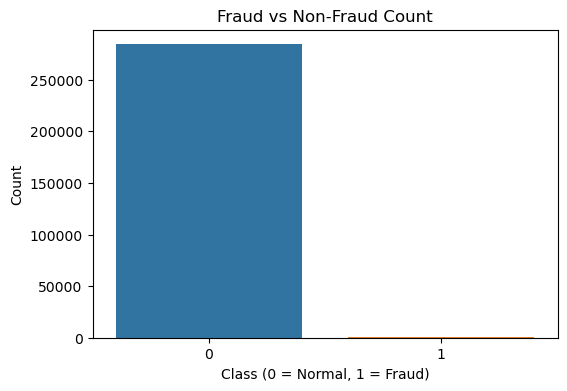

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df['Class'])
plt.title("Fraud vs Non-Fraud Count")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

Transaction Amount Distribution

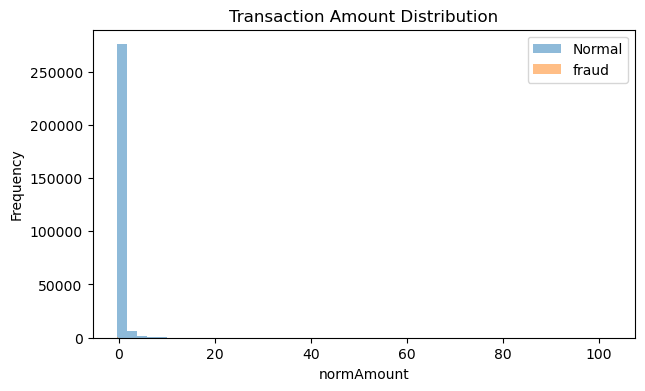

In [12]:
plt.figure(figsize=(7,4))
df[df["Class"]==0]["normAmount"].plot(kind='hist', bins=50, alpha=0.5, label="Normal")
df[df["Class"]==1]["normAmount"].plot(kind='hist', bins=50, alpha=0.5, label="fraud")
plt.legend()
plt.title("Transaction Amount Distribution")
plt.xlabel("normAmount")
plt.ylabel("Frequency")
plt.show()

Correlation Heatmap

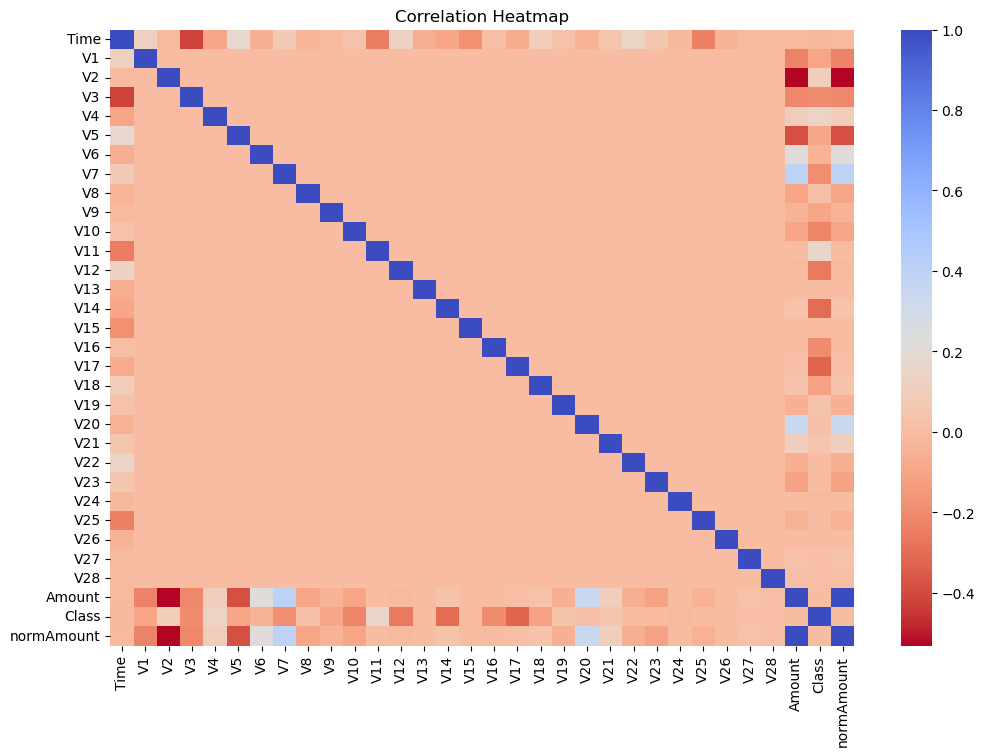

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm_r")
plt.title("Correlation Heatmap")
plt.show()

Boxplot to Detect Outliers (Amount)

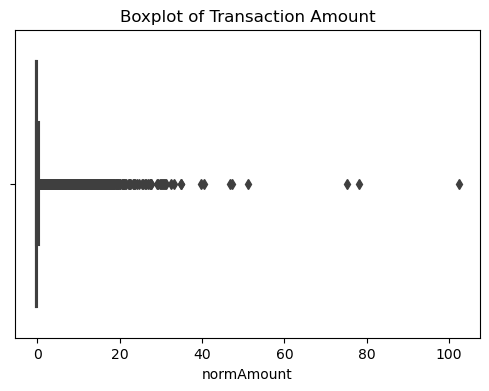

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["normAmount"])
plt.title("Boxplot of Transaction Amount")
plt.show()

Time vs Amount Plot

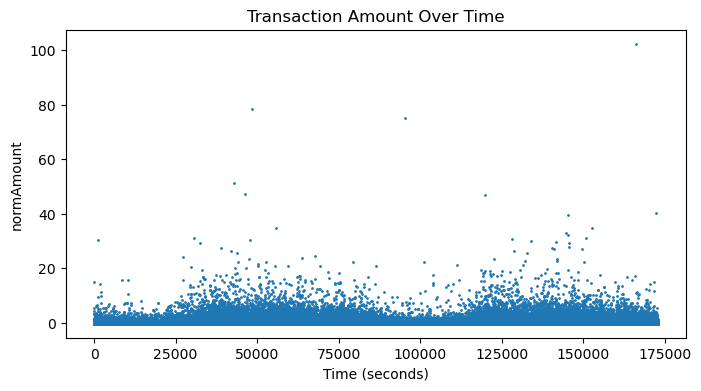

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(df["Time"], df["normAmount"], s=1)
plt.title("Transaction Amount Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("normAmount")
plt.show()

Fraud Transaction Time Pattern

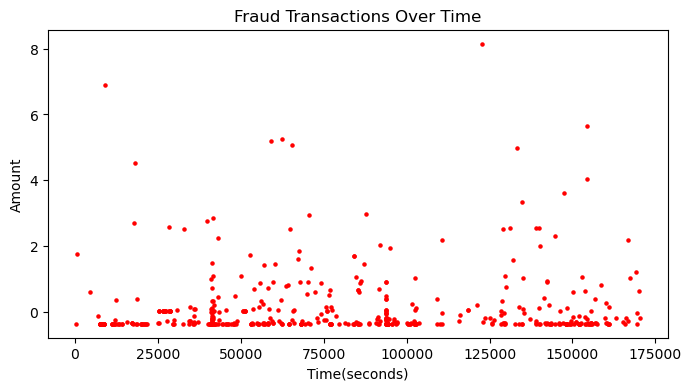

In [16]:
fraud = df[df["Class"]==1]

plt.figure(figsize=(8,4))
plt.scatter(fraud["Time"], fraud["normAmount"], color='red', s=5)
plt.title("Fraud Transactions Over Time")
plt.xlabel("Time(seconds)")
plt.ylabel("Amount")
plt.show()


CONCULSION


 1.Implement continuous real-time monitoring to quickly identify suspicious activities.

 2.Regularly retrain the machine learning models to improve accuracy and adapt to new fraud patterns.

3.Use alert systems to notify admins immediately when abnormal behavior is detected.

4.Maintain clean and updated datasets to ensure reliable predictions.

5.Integrate a user-friendly dashboard so analysts can easily view insights and take decisions.

6.Conduct periodic system audits to check performance and reduce false positives.

7.Strengthen security protocols to protect sensitive data used in the system.

8.Plan future upgrades such as advanced algorithms, deep learning, and automated response actions.